<a href="https://colab.research.google.com/github/Ray-Man05/Machine_Learning_Tutorials/blob/main/Fireship_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.18.0


In [ ]:
# Some data natively shipped with the library to get your feet wet
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [ ]:
# This here keras library can build sequential neural networks layer by layer
model = tf.keras.Sequential([
    # First layer. Sort of flattens a 28*28px image into a 1d array, with activation values for each pixel
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Second layer. Called a dense layer, with 128 nodes/neurons. Takes in activation output, spits out values into the next layer.
    # See 3b1b for better intuition.
    # This here uses something called a 'rectified linear activation function', it uses thresholds, below it the func outputs 0, above the output scales linearly.
    # Behaviour of this layer can be tuned using 'hyperparameters'
    tf.keras.layers.Dense(128, activation='relu'),
    # Same as the above but with less nodes, actually just as many as there are label_types
    # This is basically your ouput
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              # Basically telling it to optimize a certain loss function, here 'SparseCategoricalCrossentropy'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# trying gru
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28*28, 1), input_shape=(28, 28)),  # Treat pixels as a sequence
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# An epoch is complete pass through the entire training dataset,
# every single sample is fed through the model, then weights/biases are updated based on the calculated loss/error
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.4605 - loss: 1.3506
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 43ms/step - accuracy: 0.7836 - loss: 0.6026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8402 - loss: 0.4360
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8605 - loss: 0.3782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8714 - loss: 0.3523
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8769 - loss: 0.3271
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8810 - loss: 0.3174
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 43ms/step - accuracy: 0.8863 - loss: 0.3012
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8925 - loss: 0.2915
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8937 - loss: 0.2836


In [ ]:
probabilty_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])
predictions = probabilty_model.predict(test_images)
predictions[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


array([0.08534031, 0.08534029, 0.08534031, 0.08534092, 0.08534073,
       0.08534505, 0.08534054, 0.08535742, 0.08534088, 0.2319136 ],
      dtype=float32)

Getting the data for a random image to display. The picture, its actual label, the predicted probabilities for each potantial label as well as the most probable one, aka the predicted label.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
image_index = randint(0, len(test_images) - 1)

image = test_images[image_index]
true_label = test_labels[image_index]
predicted_probabilities = predictions[image_index]
predicted_label = np.argmax(predicted_probabilities)


Displaying the actual data, image + predictions in a matplotlib plot.

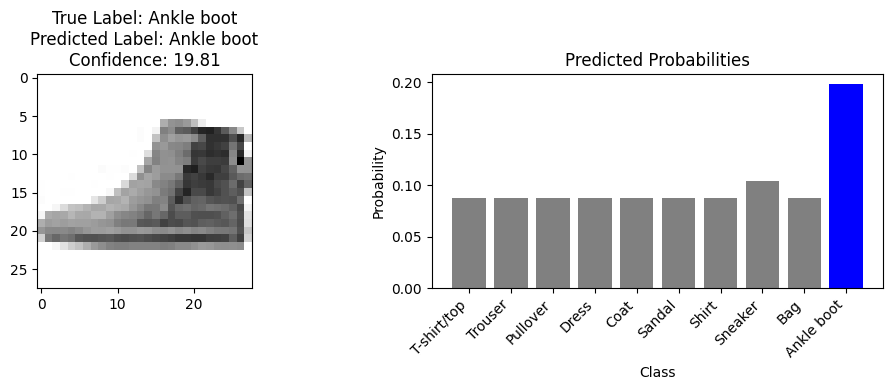

In [ ]:
plt.figure(figsize=(10, 4))
# Show the image on the first column
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.binary)
plt.title("True Label: %s\nPredicted Label: %s\nConfidence: %.2f" % (class_names[true_label], class_names[predicted_label], 100*np.max(predicted_probabilities)))

# Show the predicted probabilities on the second row
plt.subplot(1, 2, 2)
plt.bar(class_names, predicted_probabilities, color='grey')
# Highlight the predicted label
plt.bar(class_names[predicted_label], predicted_probabilities[predicted_label], color='blue')

plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(rotation=45, ha='right')
plt.title("Predicted Probabilities")
plt.tight_layout()
plt.show()